# Verschiedene Auswertungen zu den Bestellungen aus shopware

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

# Einlesen des CSV-Files das in Apollon erstellt wurde Titel= Versandretouren 095 neu
df = pd.read_csv('Standardprofil Bestellungen.csv',
                 encoding='cp1252',
                 sep=';',
                 usecols=[1, 3, 4, 5, 7, 8, 20, 21, 23],
                 parse_dates=['order_date_time'])

df.columns = ['Bestell-Nr', 'Vorname', 'Name', 'E-Mail', 'PLZ', 'Ort', 'Betrag', 'Status', 'Bestell-Datum']

# Erstellt ein Feld mit Jahr und Kalenderwoche
df['Jahr_Woche'] = df['Bestell-Datum'].dt.strftime('%Y-%V')
df['Jahr_Monat'] = df['Bestell-Datum'].dt.strftime('%Y-%m')


# Dict der Bestellungsstati erstellen
# liste_keys = list(df['Status'].unique())
# liste_values = ['Abgeschlossen', 'Abgebrochen', 'in Bearbeitung', 'Offen', 'noch_nicht_definiert']
# dict_stati = dict(zip(liste_keys, liste_values))
dict_stati = {'631746e6b48842b18a8fe0b252ebe131': 'Abgeschlossen',
              '4c3514aaa4e448a5a142a216f18f350b': 'Abgebrochen',
              '4e61d3596d094072a3e7b138cef95080': 'in Bearbeitung',
              'c1d1f7e8848147948abebd0efdf446cd': 'Offen',
              'ff2fa796931b471a8a99c8259c18da49': 'Bereit zur Abholung'}

# Ersetzt die IDs der Stati durch die richtigen Begriffe
df.replace({"Status": dict_stati}, inplace=True)

# Definieren von Click&Collect-Bestellungen (dort wo der Bestellungsbetrag = 0) ist
df['click_and_collect'] = np.where(df['Betrag'] == 0, 1, 0)


# Erstellt ein Dataframe mit abgebrochenen Bestellungen
abgebrochen = df['Status'] == 'Abgebrochen'
df_abgebrochen = df[abgebrochen]
df_abgebrochen_sum = df_abgebrochen.groupby('Jahr_Woche').aggregate({'Betrag':['count']})
total_abgebrochen = df_abgebrochen_sum.sum()

# Erstellt ein Dataframe mit regulären Bestellungen ohne Click&Collect
kein_click_and_collect = df['click_and_collect'] == 0
df_regulaer = df[~abgebrochen & kein_click_and_collect]
df_regulaer_sum = df_regulaer.groupby('Jahr_Woche').aggregate({'Betrag':['count']})
total_regular = df_regulaer_sum.sum()
df_regulaer_sum_mon = df_regulaer.groupby('Jahr_Monat').aggregate({'Betrag':['count', 'sum']})

# Erstellt ein Dataframe mit Click&Collect-Bestellungen
click_and_collect =  df['click_and_collect'] == 1
df_click_and_collect = df[click_and_collect & ~abgebrochen]        
df_click_and_collect_sum = df_click_and_collect.groupby('Jahr_Woche').aggregate({'click_and_collect':['count']})
total_click_and_collect = df_click_and_collect_sum.sum()


In [2]:
today = date.today()
d1 = today.strftime("%d/%m/%Y")
print("Auswertung per: ", d1)

Auswertung per:  28/07/2023


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Bestell-Nr         2200 non-null   int64              
 1   Vorname            2200 non-null   object             
 2   Name               2200 non-null   object             
 3   E-Mail             2200 non-null   object             
 4   PLZ                2200 non-null   int64              
 5   Ort                2200 non-null   object             
 6   Betrag             2200 non-null   float64            
 7   Status             2200 non-null   object             
 8   Bestell-Datum      2200 non-null   datetime64[ns, UTC]
 9   Jahr_Woche         2200 non-null   object             
 10  Jahr_Monat         2200 non-null   object             
 11  click_and_collect  2200 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1),

## Teilauswertungen

### Anteil an Click&Collect Bestellungen (dort wo Betrag = 0 ist) pro Woche und Total

In [4]:
df.groupby(['Jahr_Woche']).aggregate({'click_and_collect': ['sum']})

,click_and_collect
,sum
Jahr_Woche,
2023-24,109
2023-25,160
2023-26,122
2023-27,81
2023-28,90
2023-29,108
2023-30,96


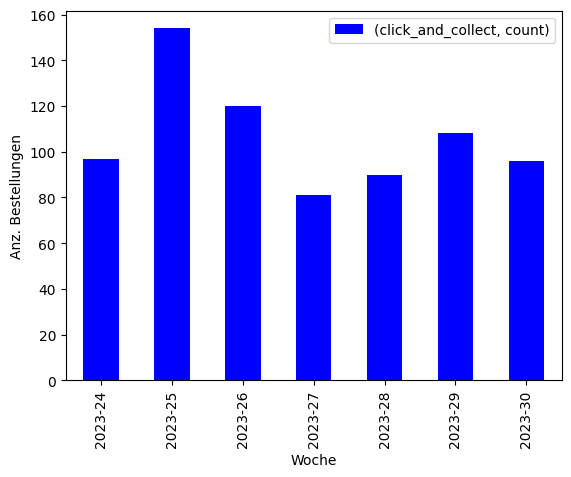

In [5]:
df_click_and_collect_sum.plot.bar(xlabel='Woche', ylabel='Anz. Bestellungen', legend='Test', color='blue')
plt.legend()

In [6]:
print('Total Click&Collect-Bestellungen')
print(total_click_and_collect)

Total Click&Collect-Bestellungen
click_and_collect  count    746
dtype: int64


In [7]:
dict_stati

{'631746e6b48842b18a8fe0b252ebe131': 'Abgeschlossen',
 '4c3514aaa4e448a5a142a216f18f350b': 'Abgebrochen',
 '4e61d3596d094072a3e7b138cef95080': 'in Bearbeitung',
 'c1d1f7e8848147948abebd0efdf446cd': 'Offen',
 'ff2fa796931b471a8a99c8259c18da49': 'Bereit zur Abholung'}

### Anzahl Bestellungen nach Bestellnummern pro Woche und Total

In [8]:
df.groupby(['Jahr_Woche']).aggregate({'Bestell-Nr':['count', 'sum']})

Bestell-Nr         
                count      sum
Jahr_Woche                    
2023-24           285  3013875
2023-25           460  5036284
2023-26           355  4045999
2023-27           287  3367665
2023-28           266  3195059
2023-29           298  3663463
2023-30           249  3129183

In [9]:
df.groupby(['Jahr_Woche']).aggregate({'Bestell-Nr':['count', 'sum']}).sum()

Bestell-Nr  count        2200
            sum      25451528
dtype: int64

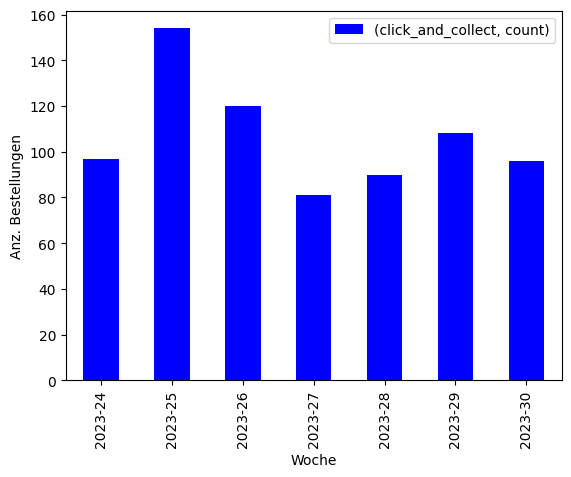

In [10]:
df_click_and_collect_sum.plot.bar(xlabel='Woche', ylabel='Anz. Bestellungen', legend='Test', color='blue')
plt.legend()

### Anzahl abgebrochener Bestellungen

In [11]:
df_abgebrochen_sum

,Betrag
,count
Jahr_Woche,
2023-24,46
2023-25,40
2023-26,16
2023-27,6
2023-28,7
2023-29,14
2023-30,15


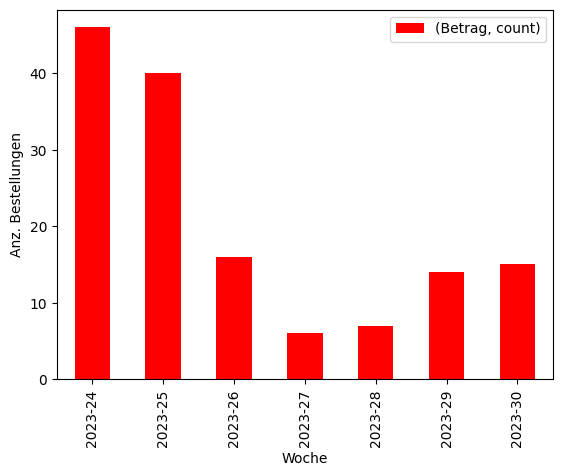

In [12]:
df_abgebrochen_sum.plot.bar(xlabel='Woche', ylabel='Anz. Bestellungen', legend='Test', color='red')
plt.legend()

In [13]:
print('Total  abgebrochene Bestellungen')
print(total_abgebrochen)

Total  abgebrochene Bestellungen
Betrag  count    144
dtype: int64


## Anzahl reguläre Bestellungen

In [14]:

df_regulaer_sum

,Betrag
,count
Jahr_Woche,
2023-24,142
2023-25,266
2023-26,219
2023-27,200
2023-28,169
2023-29,176
2023-30,138


In [15]:
total_regular

Betrag  count    1310
dtype: int64

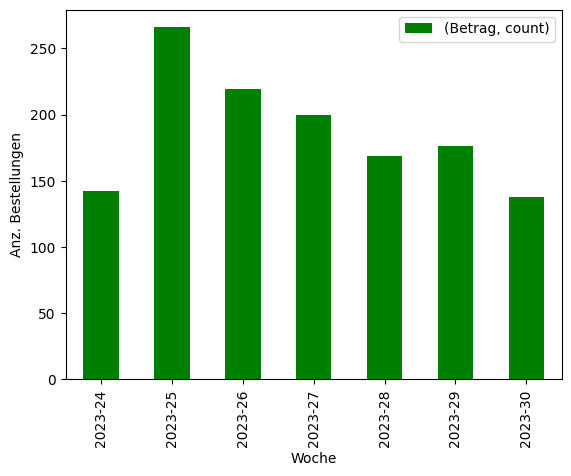

In [16]:
df_regulaer_sum.plot.bar(xlabel='Woche', ylabel='Anz. Bestellungen', legend='Test', color='green')
plt.legend()

In [17]:
print('Online Bestellungen')
print(total_regular)

Online Bestellungen
Betrag  count    1310
dtype: int64


In [18]:
print('Online Bestellungen')
total_click_and_collect

Online Bestellungen


click_and_collect  count    746
dtype: int64

In [19]:
total_regular

Betrag  count    1310
dtype: int64

In [20]:
merged_df = pd.merge(df_regulaer_sum, df_abgebrochen_sum, on = 'Jahr_Woche')
merged_df_2 =pd.merge(merged_df, df_click_and_collect_sum, on = 'Jahr_Woche') 

In [21]:
merged_df_2

merged_df_2.columns.set_levels(['Bestellungen', 'Abgebrochen', 'click_and_collect'], level=0, inplace=True )

C:\Users\avitr\AppData\Local\Temp\ipykernel_12960\4283660780.py:3: FutureWarning: inplace is deprecated and will be removed in a future version.
  merged_df_2.columns.set_levels(['Bestellungen', 'Abgebrochen', 'click_and_collect'], level=0, inplace=True )


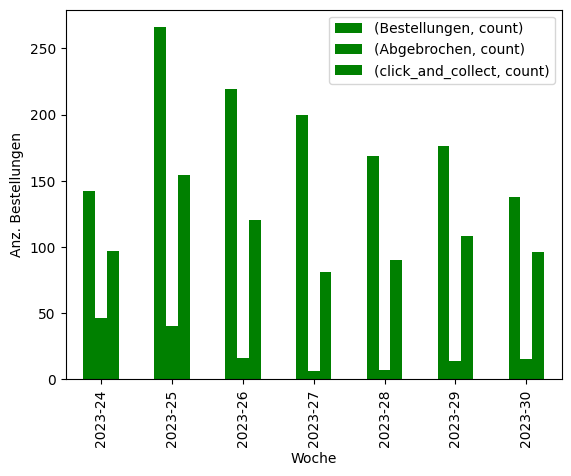

In [22]:
merged_df_2.plot.bar(xlabel='Woche', ylabel='Anz. Bestellungen', legend='Test', color='green')
plt.legend()

In [23]:
merged_df_2

,Bestellungen,Abgebrochen,click_and_collect
,count,count,count
Jahr_Woche,,,
2023-24,142,46,97
2023-25,266,40,154
2023-26,219,16,120
2023-27,200,6,81
2023-28,169,7,90
2023-29,176,14,108
2023-30,138,15,96


## Die 20 letzten abgebrochenen Bestellungen zum Kontrollieren

In [24]:
df_abgebrochen[['Bestell-Nr', 'Name', 'E-Mail', 'Betrag']].tail(n=20)

,Bestell-Nr,Name,E-Mail,Betrag
1808,12300,Campos Garcia,dina300@msn.com,31.45
1809,12301,Campos Garcia,dina300@msn.com,55.20
1814,12306,Nutt,m.nutt@adon.li,249.00
1816,12308,Nutt,m.nutt@adon.li,498.00
1939,12431,Baumann,benjamin@familiebaumann.ch,260.00
1953,12445,Schilter,katja.schilter@icloud.com,102.50
1957,12449,Waeber,silvia.waeber13@gmx.ch,197.60
1992,12484,KÃ¼nzli,silvia.kuenzli@immonetwork.ch,134.00
1995,12487,Testet,kuhlmann@men-at-work.de,47.60
1996,12488,Testet,kuhlmann@men-at-work.de,47.60


In [25]:
df_click_and_collect[['Bestell-Nr', 'Status']]

,Bestell-Nr,Status
11,10444,in Bearbeitung
20,10453,Bereit zur Abholung
27,10460,Bereit zur Abholung
37,10470,Bereit zur Abholung
38,10471,in Bearbeitung
...,...,...
2192,12684,Offen
2194,12686,Offen
2195,12687,Offen
2196,12688,Offen


# NEW CODE

In [26]:
df_regulaer_sum_mon['Betrag','Final_val'] = df_regulaer_sum_mon['Betrag']['sum']/df_regulaer_sum_mon['Betrag']['count']

In [27]:
df_regulaer_sum_mon

Betrag                      
            count        sum  Final_val
Jahr_Monat                             
2023-06       574   94162.76  164.04662
2023-07       736  117908.90  160.20231

In [28]:
df_regulaer_sum_mon.columns = df_regulaer_sum_mon.columns.droplevel(0)

In [29]:
df_regulaer_sum_mon.reset_index(inplace=True)

In [30]:
df_regulaer_sum_mon

,Jahr_Monat,count,sum,Final_val
0,2023-06,574,94162.76,164.04662
1,2023-07,736,117908.90,160.20231


# Merge-> Multi to Single

In [31]:
merged_df = pd.merge(df_regulaer_sum, df_abgebrochen_sum, on = 'Jahr_Woche')
merged_df_2 =pd.merge(merged_df, df_click_and_collect_sum, on = 'Jahr_Woche') 

In [32]:
merged_df_2.columns = merged_df_2.columns.droplevel(1)

In [33]:
merged_df_2.reset_index(inplace=True)

In [34]:
merged_df_2

,Jahr_Woche,Betrag_x,Betrag_y,click_and_collect
0,2023-24,142,46,97
1,2023-25,266,40,154
2,2023-26,219,16,120
3,2023-27,200,6,81
4,2023-28,169,7,90
5,2023-29,176,14,108
6,2023-30,138,15,96
